<div style="text-align: center;font-size: 24pt;">
    <h1>START</h1>
</div>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import glob
import cv2
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import *

In [2]:
# Loading imgs 
imgs=glob.glob('Img/*')

# Loading csv file
df = pd.read_csv("english.csv")
df.head(6)

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
5,Img/img001-006.png,0


In [3]:
new_imgs = sorted(imgs)

In [4]:
labels = df['label'].tolist()
new_data = []
for i in new_imgs:
    # Read image
    img = cv2.imread(i, 1)
    # Resize image
    img = cv2.resize(img, (64, 64))
    # Append to new_data list
    new_data.append(img)

new_data = np.array(new_data)

In [5]:
labels = np.array(labels)
# Encode labels
Encoder = LabelEncoder()
labels = Encoder.fit_transform(labels)

In [6]:
# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(new_data, labels, test_size=0.2, random_state=42)

In [7]:
# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

## Model Building

In [8]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20,validation_split = 0.2)

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 55s 766ms/step - accuracy: 0.0154 - loss: 4.2186 - val_accuracy: 0.0385 - val_loss: 3.9646
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 56s 813ms/step - accuracy: 0.0868 - loss: 3.6987 - val_accuracy: 0.1575 - val_loss: 3.1818
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 55s 803ms/step - accuracy: 0.1851 - loss: 2.9258 - val_accuracy: 0.2234 - val_loss: 2.6984
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 58s 844ms/step - accuracy: 0.3001 - loss: 2.3612 - val_accuracy: 0.3352 - val_loss: 2.2478
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 58s 844ms/step - accuracy: 0.4160 - loss: 1.9419 - val_accuracy: 0.4029 - val_loss: 1.9770
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 54s 777ms/step - accuracy: 0.5469 - loss: 1.4913 - val_accuracy: 0.4890 - val_loss: 1.7334
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 53s 769ms/step - accuracy: 0.6361 - loss: 1.2010 - val_accuracy: 0.5495 - val_loss: 1.5390
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 54s 780ms/step - accuracy: 0.7404 - loss: 0.9154 - val_accu

In [9]:
model.evaluate(test_images,test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.6662 - loss: 1.2468


[1.1558399200439453, 0.7067448496818542]

## Make Predictions

In [10]:
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(test_labels, y_pred_labels)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step
Accuracy: 0.7067448680351907
Precision: 0.7435877473566546
Recall: 0.7067448680351907
F1 Score: 0.7027993138351115
Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 9 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 1 ... 8 0 0]
 [0 0 0 ... 1 6 0]
 [0 0 0 ... 0 0 7]]


## Visualization

In [11]:
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7435877473566546
Recall: 0.7067448680351907


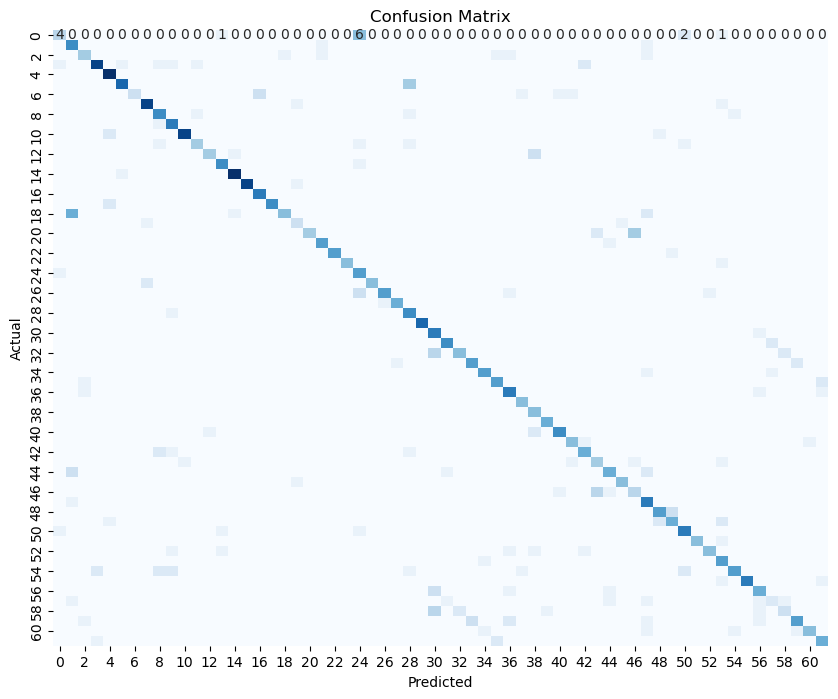

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


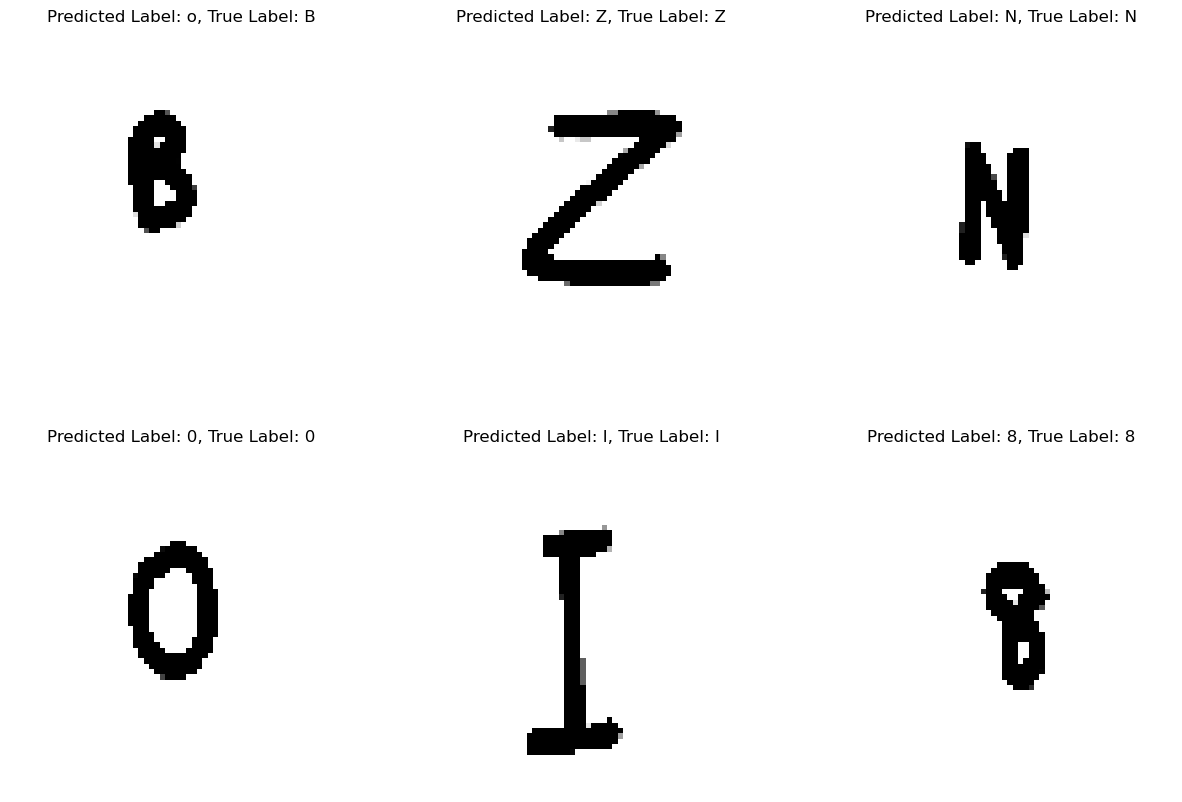

In [13]:
import random

# Randomly select 6 indices from the test set
random_indices = random.sample(range(len(test_images)), 6)

# Predict probabilities for each class for the randomly selected images
y_pred_probs = model.predict(test_images[random_indices])

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Decode the predicted labels
y_pred_labels_decoded = Encoder.inverse_transform(y_pred_labels)

# Decode the true labels
y_true_labels_decoded = Encoder.inverse_transform(test_labels[random_indices])

# Display the randomly selected test images along with their predicted and true labels
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i+1)
    plt.imshow(test_images[idx])
    plt.title(f'Predicted Label: {y_pred_labels_decoded[i]}, True Label: {y_true_labels_decoded[i]}')
    plt.axis('off')
plt.show()

<div style="text-align: center;font-size: 24pt;">
    <h1>THE END</h1>
</div>